# Building Recommender Systems with Spotify Data

## Import Libraries

In [1]:
import ipykernel
ipykernel.__version__
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams.update({'font.size': 22})
%matplotlib inline

## Reading the Data

In [2]:
spotify_data = pd.read_csv('./data/data.csv.zip')
genre_data = pd.read_csv('./data/data_by_genres.csv')
data_by_year = pd.read_csv('./data/data_by_year.csv')
spotify_data.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


In [19]:
spotify_data.info()
num_songs = spotify_data.shape[0]
print(f"Il y a {num_songs} chansons dans l'ensemble de données.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [5]:
data_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


## Exploratory Data Analysis

C:\Users\reube\AppData\Local\Temp\ipykernel_1424\129732028.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spotify_data['popularity'])


<Axes: xlabel='popularity', ylabel='Density'>

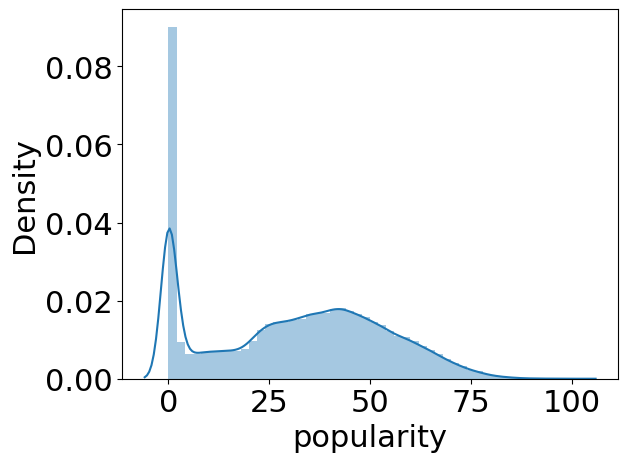

In [6]:
sns.distplot(spotify_data['popularity'])

### Music Over Time

In [7]:
def get_decade(year):
    
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    
    return decade

spotify_data['decade'] = spotify_data['year'].apply(get_decade)

<Axes: xlabel='count', ylabel='decade'>

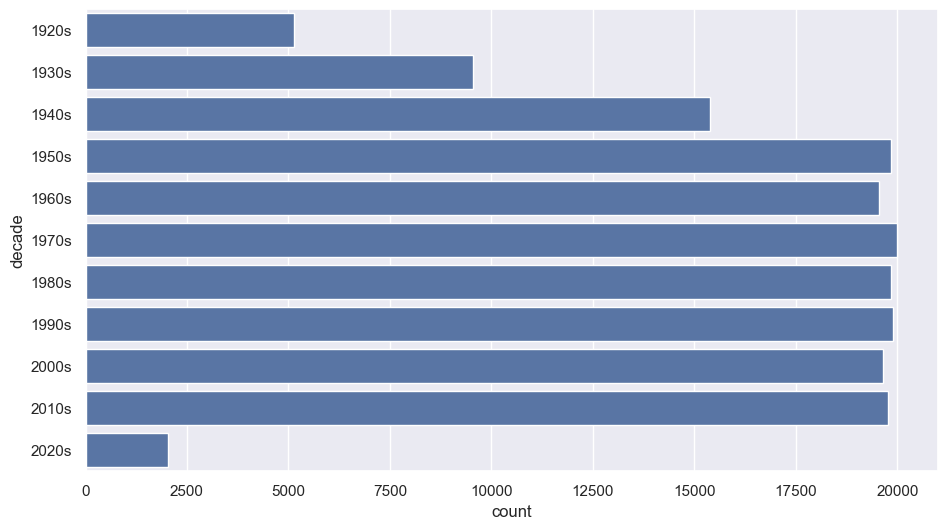

In [8]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(spotify_data['decade'])

### Characteristics of Different Genres

In [9]:
top10_genres = genre_data.nlargest(10, 'popularity')

## Clustering Genres

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])

X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

c:\Users\reube\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.003s...
[t-SNE] Computed neighbors for 2973 samples in 0.161s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] Computed conditional probabilities in 0.043s
[t-SNE] Iteration 50: error = 78.8332520, gradient norm = 0.0273026 (50 iterations in 0.456s)
[t-SNE] Iteration 100: error = 76.2445755, gradient norm = 0.0014035 (50 iterations in 0.312s)
[t-SNE] Iteration 150: error = 76.1405792, gradient norm = 0.0004512 (50 iterations in 0.294s)
[t-SNE] Iteration 200: error = 76.1153259, gradient norm = 0.0001376 (50 iterations in 0.307s)
[t-SNE] Iteration 250: error = 76.1061707, gradient norm = 0.0000811 (50 iterations in 0.283s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106171
[t-SNE] Iteration 300: erro

## Clustering Songs

In [13]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2))], verbose=True)
X = spotify_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
Initialization complete
Iteration 0, inertia 1510200.286761178.
Iteration 1, inertia 1148805.8509332826.
Iteration 2, inertia 1118037.0746028377.
Iteration 3, inertia 1104650.7573262153.
Iteration 4, inertia 1096372.814138267.
Iteration 5, inertia 1091260.4613882161.
Iteration 6, inertia 1087504.4031436653.
Iteration 7, inertia 1084470.5247959467.
Iteration 8, inertia 1082771.0729706124.
Iteration 9, inertia 1081356.1602514202.
Iteration 10, inertia 1080291.9713209637.
Iteration 11, inertia 1079574.4893248728.
Iteration 12, inertia 1079108.6912409444.
Iteration 13, inertia 1078801.6242842039.
Iteration 14, inertia 1078511.7638150742.
Iteration 15, inertia 1078165.2439418007.
Iteration 16, inertia 1077506.509008602.
Iteration 17, inertia 1075405.6540089676.
Iteration 18, inertia 1070041.0569091376.
Iteration 19, inertia 1064308.5606786741.
Iteration 20, inertia 1061460.2596897262.
Iteration 21, inertia 1060219.042544

c:\Users\reube\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 23, inertia 1059340.7942277647.
Iteration 24, inertia 1059180.9057800001.
Iteration 25, inertia 1059098.7013699505.
Iteration 26, inertia 1059056.7903017185.
Iteration 27, inertia 1059031.3662050022.
Iteration 28, inertia 1059016.176336427.
Iteration 29, inertia 1059006.5929591383.
Iteration 30, inertia 1058999.6695235914.
Iteration 31, inertia 1058994.4234410885.
Iteration 32, inertia 1058991.2521578555.
Iteration 33, inertia 1058989.2733203508.
Converged at iteration 33: center shift 9.365958454707622e-05 within tolerance 0.00010000000000000789.
Initialization complete
Iteration 0, inertia 1486760.9865580006.
Iteration 1, inertia 1164322.0132320644.
Iteration 2, inertia 1134571.3450955246.
Iteration 3, inertia 1119366.8513154462.
Iteration 4, inertia 1103434.7788236015.
Iteration 5, inertia 1090954.386183608.
Iteration 6, inertia 1085396.1043008827.
Iteration 7, inertia 1082318.8296580852.
Iteration 8, inertia 1080222.8748065548.
Iteration 9, inertia 1078762.325848244.
Iter

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=20, verbose=2))],
         verbose=True)

In [14]:
song_cluster_labels = song_cluster_pipeline.predict(X)

In [15]:
spotify_data['cluster_label'] = song_cluster_labels

In [16]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = spotify_data['name']
projection['cluster'] = spotify_data['cluster_label']

## Building a Content-Based Recommender System

In [17]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):

    song_data = spotify_data[(spotify_data['name'] == song['name']) 
                            & (spotify_data['year'] == song['year'])].iloc[0]
    return song_data

        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict
        

def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')


In [18]:
recommend_songs([{'name': "Tyler Herro", 'year': 2020}], spotify_data)


c:\Users\reube\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[{'name': 'Secrets', 'year': 2020, 'artists': "['Regard', 'RAYE']"},
 {'name': 'Stupid Again', 'year': 2020, 'artists': "['Tory Lanez']"},
 {'name': '20 Min', 'year': 2017, 'artists': "['Lil Uzi Vert']"},
 {'name': 'How I Move (feat. Lil Baby)',
  'year': 2019,
  'artists': "['Flipp Dinero', 'Lil Baby']"},
 {'name': 'hot girl bummer', 'year': 2020, 'artists': "['blackbear']"},
 {'name': 'How I Move (feat. Lil Baby)',
  'year': 2019,
  'artists': "['Flipp Dinero', 'Lil Baby']"},
 {'name': 'Me Vs Me', 'year': 2020, 'artists': "['Moneybagg Yo']"},
 {'name': 'Formation', 'year': 2016, 'artists': "['Beyoncé']"},
 {'name': 'Treasure', 'year': 2012, 'artists': "['Bruno Mars']"}]